# Foundations of AI/ML by IIIT-Hyderabad & Talent Sprint
# Lab10 Experiment 02

## Visualizing CNNs ##

In this experiment, we will first follow the approach used by [Matthew D Zeiler, Rob Fergus](https://arxiv.org/abs/1311.2901) to visualize CNNs. We will visualize a VGG16 model trained on the Imagenet dataset.

We also follow the approach used by [Mahendran and Vedaldi](https://arxiv.org/abs/1412.0035) to understand deep image representations. [Section 6 onwards]

## 1. Load the model and see its architecture

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils

import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

model = models.vgg16(pretrained=True)
print(model.features)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1

In [41]:
from utils import recreate_image

### We will load all the module details in a list 

In [9]:
# a = list(model.features.modules())
# a

In [3]:
modules = list(model.features.modules())
modules = modules[1:]
print(modules,"\n\n")
print("third module = ", modules[2])

[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False), Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False), Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False), Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), Conv2d(51

### 2. Load and preprocess an image to pass as input to the network

Text(0.5,1,'Normalized Image')

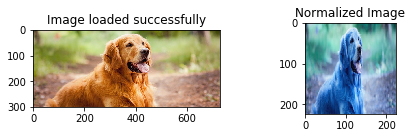

In [51]:
def normalize(image):
    normalize = transforms.Normalize(
                                        mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225]
                                    )
    preprocess = transforms.Compose([
                                        transforms.Resize((224,224)),
                                        transforms.ToTensor(),
                                        normalize
                                    ])
    image = Variable(preprocess(image).unsqueeze(0))
    return image

### IAS: Print both dogs!
fig = plt.figure(figsize=(200, 100))

img_raw = Image.open("./dog.jpg")
fig.add_subplot(50, 50, 1)
plt.imshow(img_raw)
plt.title("Image loaded successfully")

fig.add_subplot(50, 50, 2)
img = normalize(img_raw)
plt.imshow(recreate_image(img))
plt.title("Normalized Image")


In [21]:
# type(img)
# torch.sum??
# a = torch.randn(5, 4)
# print(a)
# torch.sum(a, dim=0)


-0.8223 -0.5649  0.2357  0.6728
 0.2283 -1.3009  0.0665 -1.6137
-0.9784  2.1150 -0.3718 -0.4774
 1.3498  0.4227 -0.1693  0.8138
 0.8973  0.6230  0.4666  0.5503
[torch.FloatTensor of size 5x4]




 0.6747
 1.2948
 0.2278
-0.0542
[torch.FloatTensor of size 4]

### 3. Visualize the kernel weights at each layer

(#filters, i/p depth, size of filter) ===  torch.Size([64, 64, 3, 3])
No. of filters:  64

 1.3231 -0.0419 -0.6863
 0.2878 -0.5124 -1.0523
-0.4855 -0.4625 -0.6885
[torch.FloatTensor of size 3x3]



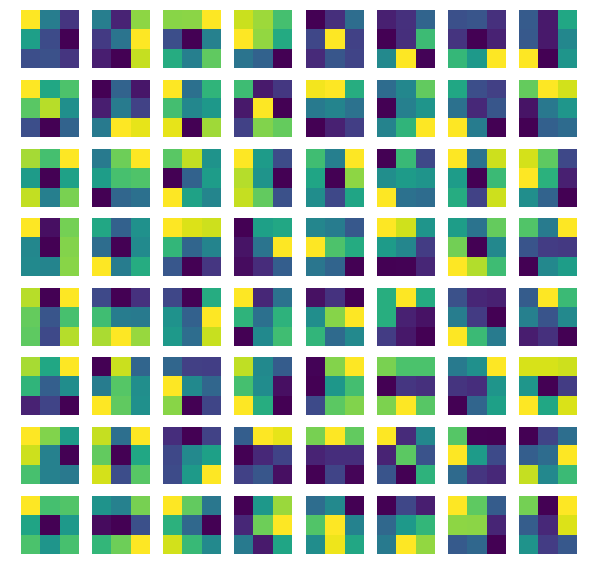

In [15]:
def visualize_weights(image, layer):
    weight_used = []
    
    ## Gather all Convolution layers and append their corresponding filters in a list
    for w in model.features.children():
        if isinstance(w, torch.nn.modules.conv.Conv2d):
            weight_used.append(w.weight.data)

    print("(#filters, i/p depth, size of filter) === ", weight_used[layer].shape)
    print("No. of filters: ", weight_used[layer].shape[0])
    filters = []
    for i in range(weight_used[layer].shape[0]):
        filters.append(weight_used[layer][i,:,:,:].sum(dim=0)) ##summing across input depth(3 in the first layer)
        filters[i].div(weight_used[layer].shape[1]) ### IAS: Taking avg across all channels's pixels
        
    print(filters[0])    
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (10, 10)
    for i in range(int(np.sqrt(weight_used[layer].shape[0])) * int(np.sqrt(weight_used[layer].shape[0]))):
        a = fig.add_subplot(np.sqrt(weight_used[layer].shape[0]), np.sqrt(weight_used[layer].shape[0]), i+1)
        imgplot = plt.imshow(filters[i])
        plt.axis('off')

visualize_weights(img, 1)

The filters are usually small $(3X3)$ and hence the visualization of filter weights usually doesn't give us a clear understanding of the what the filters learn.
 
Therefore, we will visualize how the the input image looks as it is passed through the various layers in the network.

### 4. Visualizing the image as it passes through the network

In [34]:
# print(img)
# outputs = []
# names = []
# for layer in modules:
#         image = layer(img) 
#         outputs.append(image)
#         names.append(str(layer))
#         break
# print(outputs[0], outputs[0].shape)
# print(outputs[0].squeeze(0), outputs[0].squeeze(0).shape)

Variable containing:
( 0 , 0 ,.,.) = 
  8.0423e-01  1.4573e-02  2.0169e-01  ...   8.1139e-02  1.4592e-02 -1.7534e-01
  1.0588e+00  1.5326e-02  2.7564e-01  ...   3.1410e-01  2.0812e-01 -1.4673e-01
  1.0409e+00  4.3864e-02  3.1119e-01  ...   3.0548e-01  1.9687e-01 -1.4183e-01
                 ...                   ⋱                   ...                
  1.8911e+00  6.2132e-01  5.1105e-01  ...   4.9809e-01  5.5280e-01 -6.2940e-01
  2.0071e+00  5.4002e-01  4.3366e-01  ...   5.2063e-01  6.4692e-01 -6.5909e-01
  1.7730e+00  7.8198e-01  6.7418e-01  ...   7.6845e-01  8.9576e-01 -8.5678e-02

( 0 , 1 ,.,.) = 
 -1.3109e+00 -7.6406e-01 -6.7304e-01  ...  -7.8917e-01 -7.9482e-01  1.9960e+00
 -1.1403e+00 -3.3245e-01 -1.1012e-01  ...   1.5200e-01  1.5649e-01  3.0872e+00
 -1.2442e+00 -3.4533e-01  3.4642e-02  ...   2.0215e-01  1.8827e-01  3.0911e+00
                 ...                   ⋱                   ...                
  6.5846e-01  8.0652e-01  3.8336e-01  ...   4.7459e-01  8.5311e-01  1.4145e

In [32]:
# torch.FloatTensor.squeeze??
# torch.squeeze??

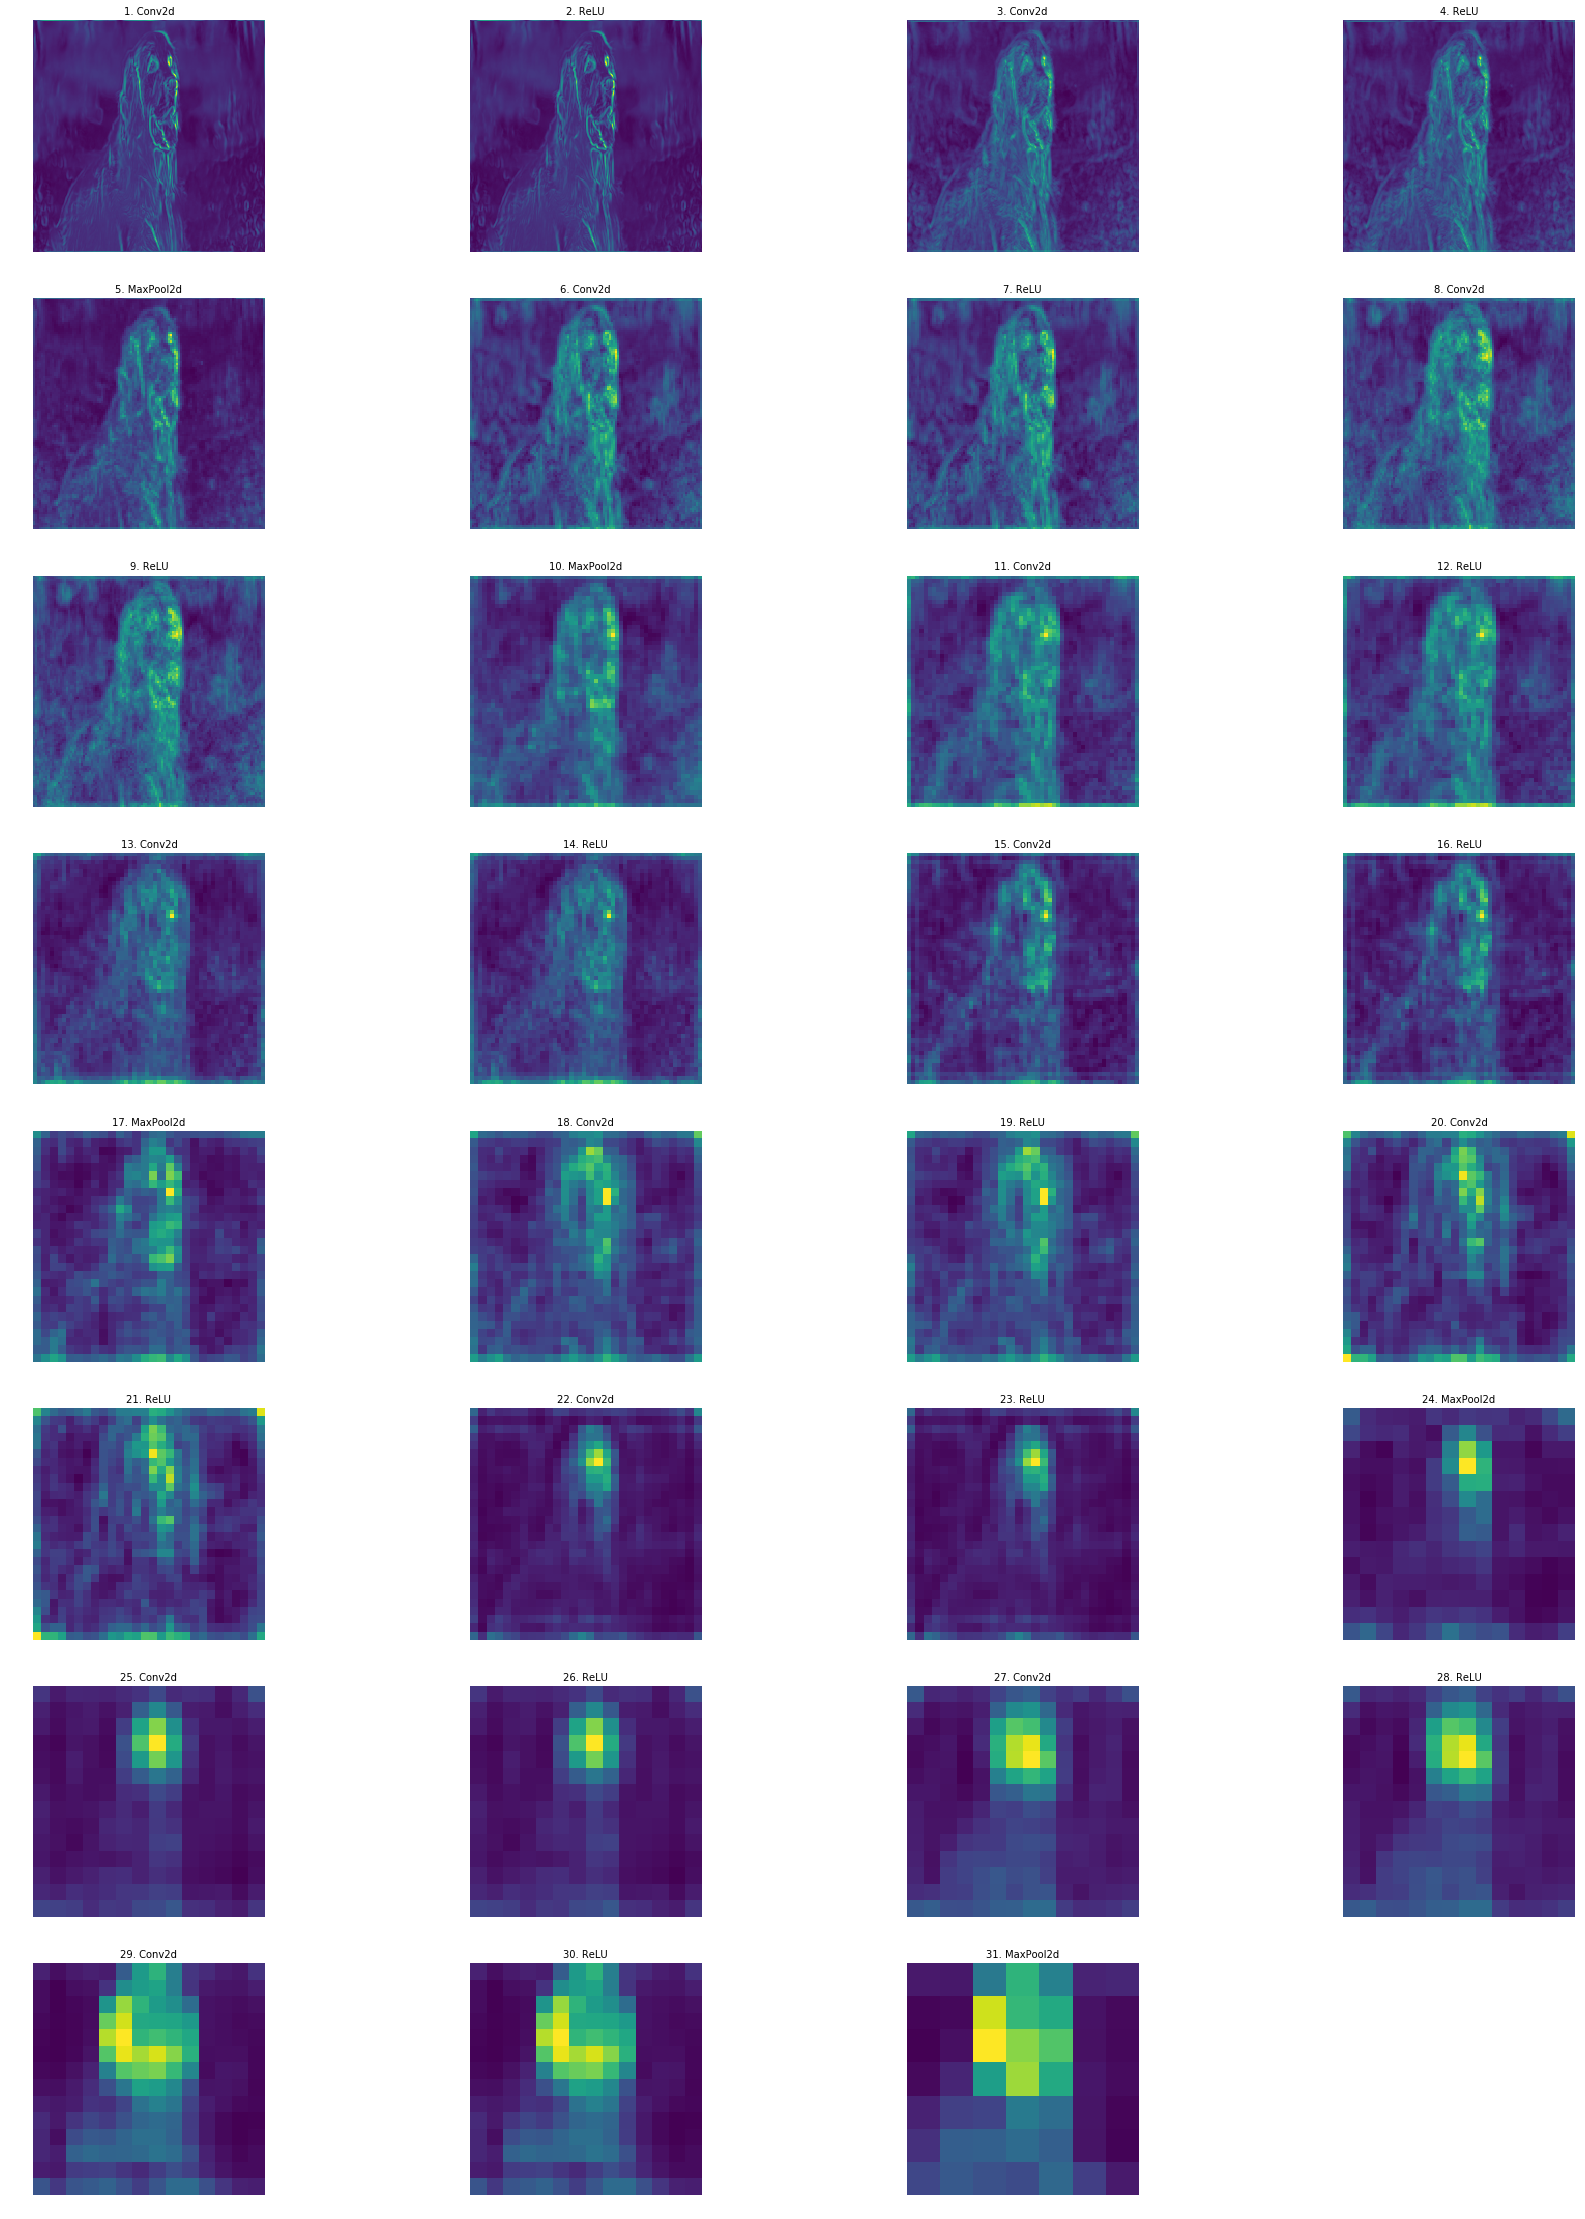

In [35]:
def to_grayscale(image):
    image = torch.sum(image, dim=0)
    image = torch.div(image, image.shape[0])
    return image

def layer_outputs(image):
    outputs = []
    names = []
    
    ## feed forward the image through the network and store the outputs
    for layer in modules:
        image = layer(image) 
        outputs.append(image)
        names.append(str(layer))
    
    ## for visualization purposes, convert the output into a 2D image by averaging across the filters.
    output_im = []
    for i in outputs:
        i = i.squeeze(0)
        temp = to_grayscale(i)  ## convert say 64x112x112 to 112x112 ### IAS: i.e. average across the channels!
        output_im.append(temp.data.numpy())
        
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (30, 40)


    for i in range(len(output_im)):
        a = fig.add_subplot(8,4,i+1)
        imgplot = plt.imshow(output_im[i])
        plt.axis('off')
        a.set_title(str(i+1)+". "+names[i].partition('(')[0], fontsize=10)

#     ##save the resulting visualization
#     plt.savefig('layer_outputs.jpg', bbox_inches='tight')

##
layer_outputs(img)

Through the above visualization, it is clearly visible how the CNN responds to an image at each layer and in the final layer, the pixels of the image which produce the highest activation values are visible as well. However, we still haven't looked at how the filters at each layer respond differently to features present in the input.

### 5. Visualizing output of each filter at a given layer 

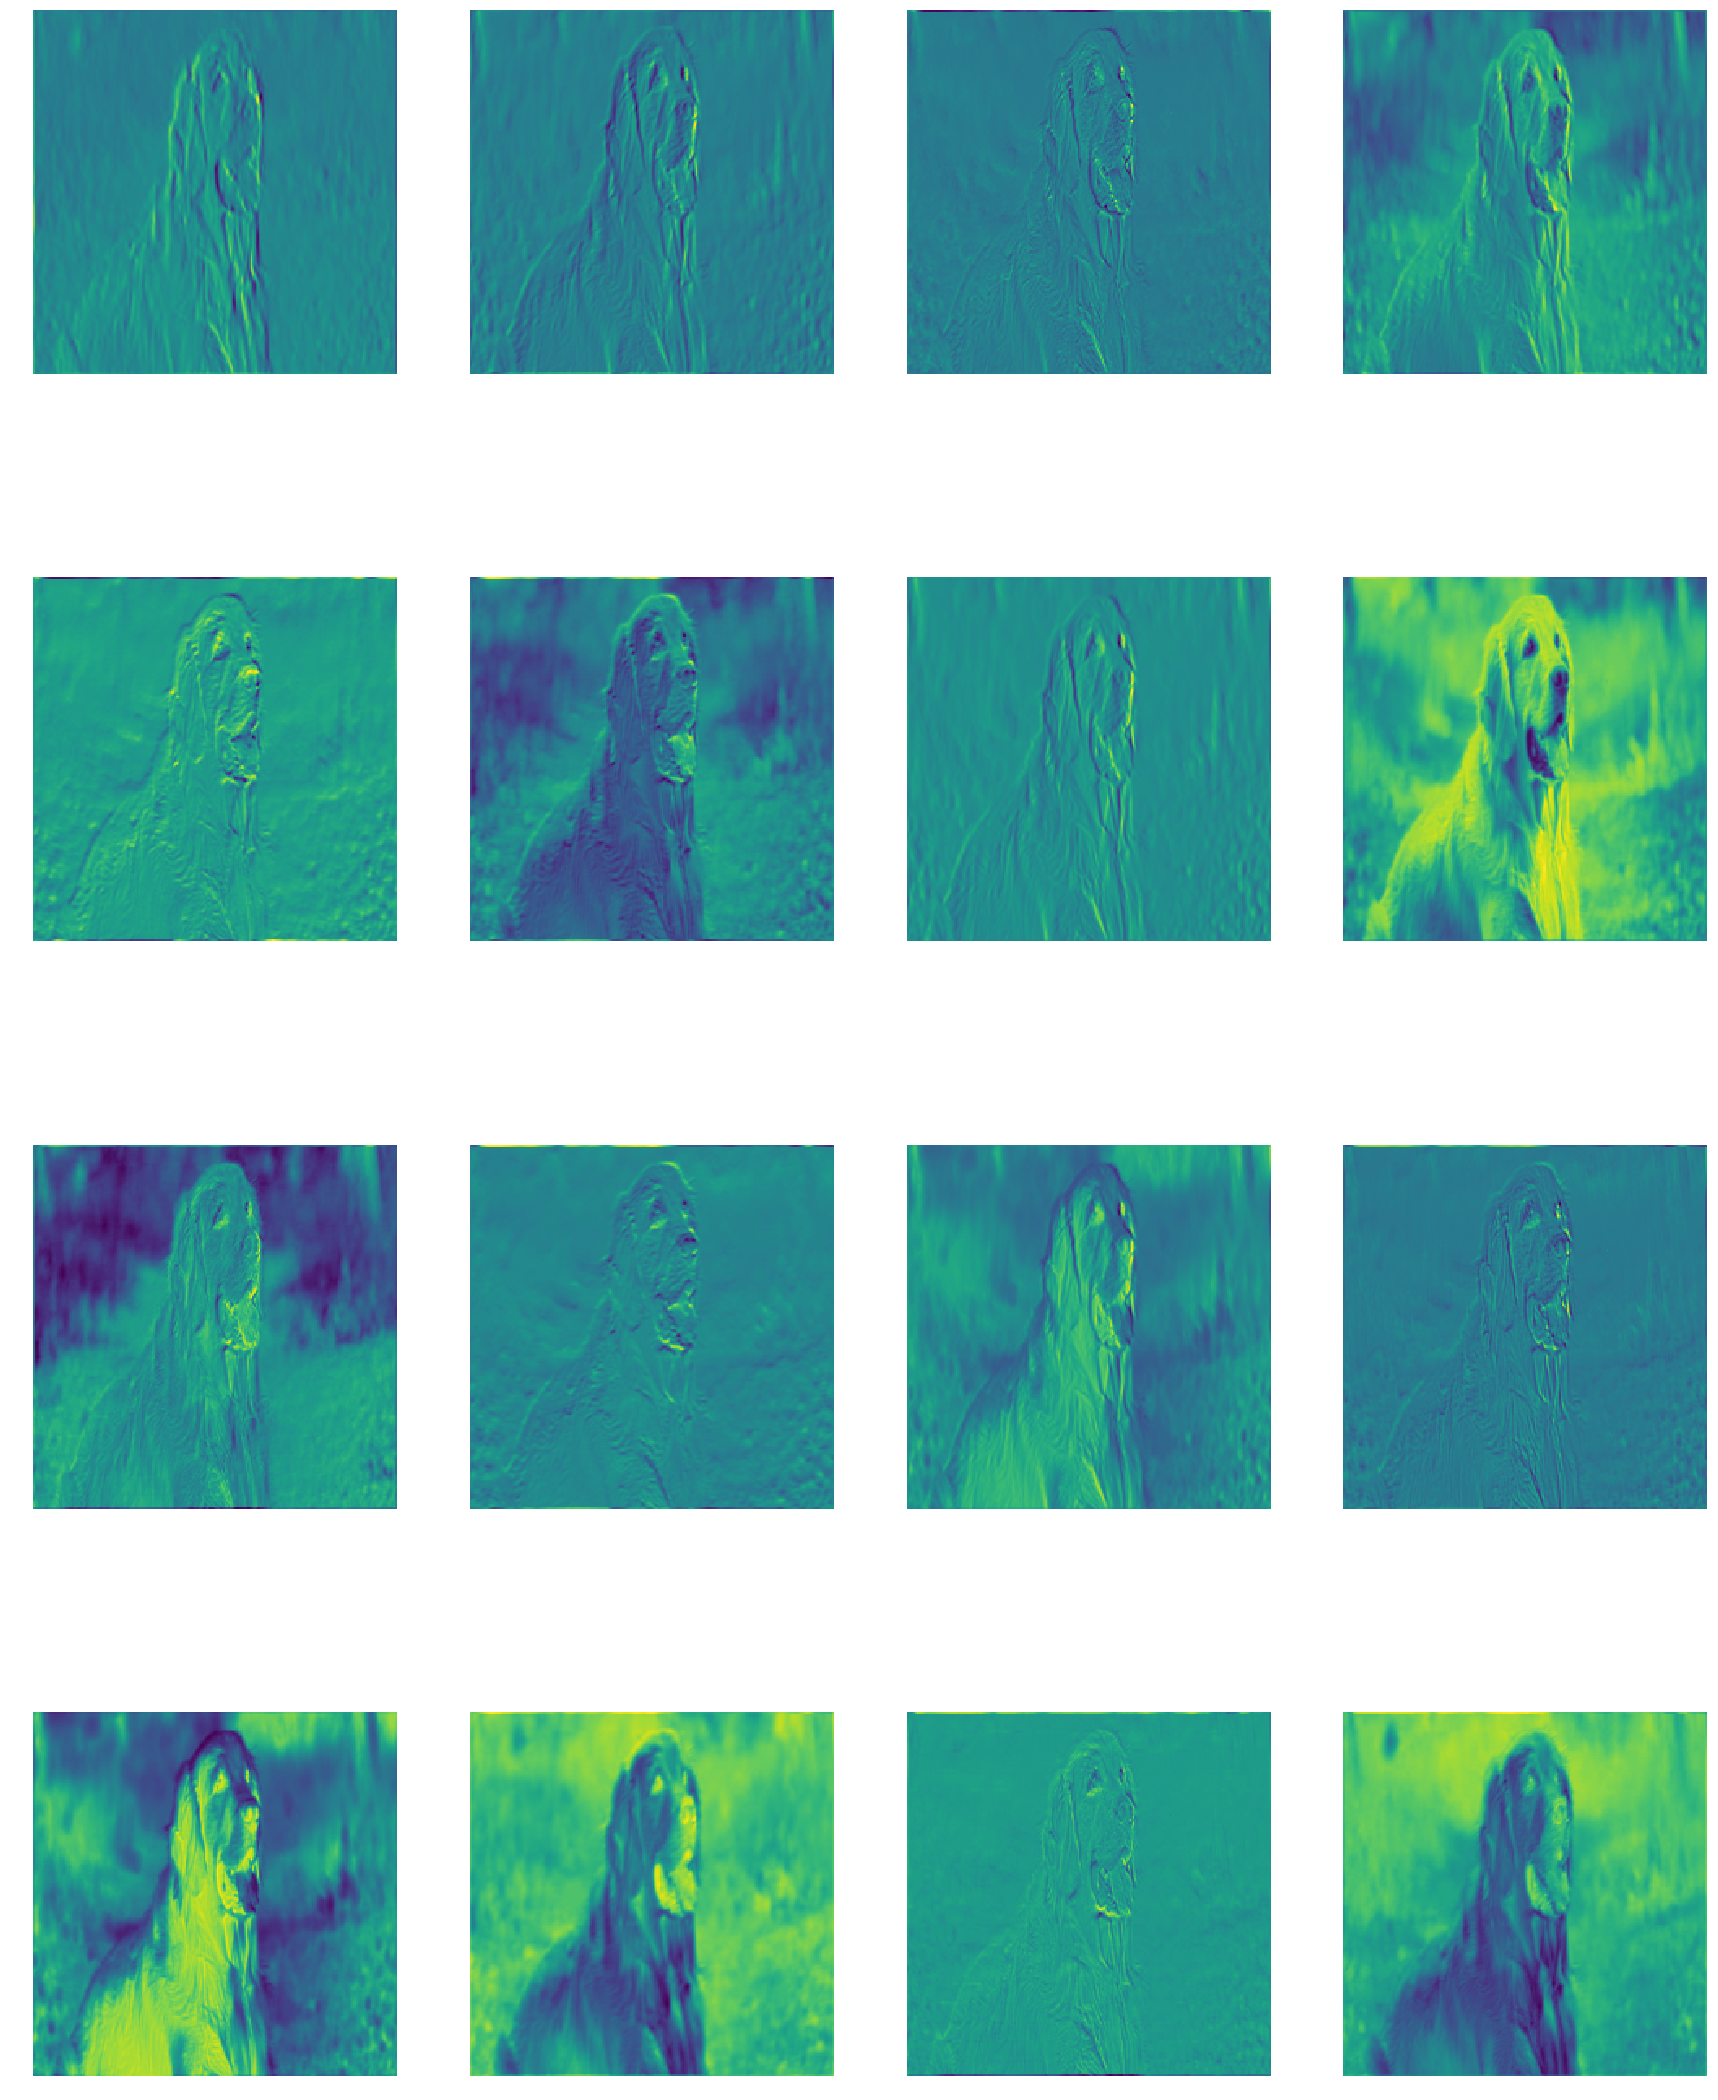

In [36]:
def filter_outputs(image, layer_to_visualize, num_filters=64):
    if layer_to_visualize < 0:
        layer_to_visualize += 31
    output = None
    name = None
    
    ## get outputs corresponding to the mentioned layer
    for count, layer in enumerate(modules):
        image = layer(image)
        if count == layer_to_visualize: 
            output = image
            name = str(layer)
            ### IAS: enhancement
            break
    
    filters = []
    output = output.data.squeeze()

    ## if num_filters==-1, visualize all the filters
    num_filters = min(num_filters, output.shape[0])
    if num_filters==-1:
        num_filters = output.shape[0]

    for i in range(num_filters):
        filters.append(output[i,:,:])
        
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (10, 10)

    for i in range(int(np.sqrt(len(filters))) * int(np.sqrt(len(filters)))):
        fig.add_subplot(np.sqrt(len(filters)), np.sqrt(len(filters)), i+1)
        imgplot = plt.imshow(filters[i])
        plt.axis('off')

## if num_filters==-1, visualize all the filters
filter_outputs(img, 0, 16)    #visualize the outputs of first 16 filters of the 1st layer

The above visualization shows that each filter responds differently to an input which implies that each filter learns and extracts different features from an input.

### 6. Understanding Deep Image Representations by Inverting Them [Mahendran, Vedaldi]

Like Zeiler and Fergus, their method starts from a specific input image. They record the network’s representation of that specific image and then reconstruct an image that produces a similar code. Thus, their method provides insight into what the activation of a whole layer represent, not what an individual neuron represents.

They show what each neuron “wants to see”, and thus what each neuron has learned to look for.

To visualize the function of a specific unit in a neural network, we $synthesize$ inputs that cause that unit to have high activation. To synthesize such a “preferred input example”, we start with a random image, meaning we randomly choose a color for each pixel. The image will initially look like colored TV static.

In [37]:
random_noise_img = Variable(1e-1 * torch.randn(1, 3, 224, 224), requires_grad=True)

Now we take an image $X$ whose representation $X_0$ at some layer $"target\_layer"$ we want to learn. Our aim is to reconstruct the noise image to get this representation $X_0$. The principle behind this is that the noise image will be so reconstructed such that it will represent what the particular layer for which it is trained against wants to see.

In [39]:
def get_output_at_nth_layer(inp, layer):
    for i in range(layer):
        inp = modules[i](inp) ### IAS: passing the input from 1 to inp layers
    return inp[0]

## dont forget that the system is 0 indexed
target_layer = 18    ## which is this layer Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
inp_img = normalize(Image.open("./dog.jpg"))
inp_img_representation = get_output_at_nth_layer(inp_img, target_layer)

Some functions of code (euclidean_loss, alpha_norm, total_variation_norm, recreate_image) are present in utils.py. If you truly want to understand how this is implemented, it is recommended that you readthe second and third page of this [paper](https://arxiv.org/abs/1412.0035), specifically, the regularization part, before asking questions on that. The aim of this code is to mainly understand the deep representations.

In [52]:
from torch.optim import SGD
import utils

#define optimizers for learning the representation of the noise input image
optimizer = SGD([random_noise_img], lr=1e4, momentum=0.9)
alpha_reg_alpha = 6
alpha_reg_lambda = 1e-7
tv_reg_beta = 2
tv_reg_lambda = 1e-8
## Put model into evaluation state
model.eval

<bound method Module.eval of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=

In [53]:
imgs=[]
for i in range(161):
        optimizer.zero_grad()
        
        ## get output at the target layer (not the final layer)
        output = get_output_at_nth_layer(random_noise_img, target_layer)
        
        # Calculate euclidian loss between output image and the target image
        euc_loss = 1e-1 * utils.euclidian_loss(inp_img_representation.detach(), output)
        
        # regularization
        reg_alpha = alpha_reg_lambda * utils.alpha_norm(random_noise_img, alpha_reg_alpha)
        reg_total_variation = tv_reg_lambda * utils.total_variation_norm(random_noise_img, tv_reg_beta)
        
        loss = euc_loss + reg_alpha + reg_total_variation
        loss.backward()
        optimizer.step()
        
        # Generate image every 5 iterations
        if i % 10 == 0:
            print('Iteration:', str(i), 'Loss:', loss.data.numpy()[0])
            x = utils.recreate_image(random_noise_img)
            imgs.append(x)

Iteration: 0 Loss: 0.089374214
Iteration: 10 Loss: 0.04998697
Iteration: 20 Loss: 0.022323597
Iteration: 30 Loss: 0.012875829
Iteration: 40 Loss: 0.009124692
Iteration: 50 Loss: 0.006305786
Iteration: 60 Loss: 0.0053718425
Iteration: 70 Loss: 0.0046008183
Iteration: 80 Loss: 0.0038931686
Iteration: 90 Loss: 0.003579942
Iteration: 100 Loss: 0.0032234176
Iteration: 110 Loss: 0.0030311584
Iteration: 120 Loss: 0.0028112212
Iteration: 130 Loss: 0.0029595317
Iteration: 140 Loss: 0.0026903753
Iteration: 150 Loss: 0.0023679782
Iteration: 160 Loss: 0.0023898687


### Visualize the learned representations for the layer "target_layer"

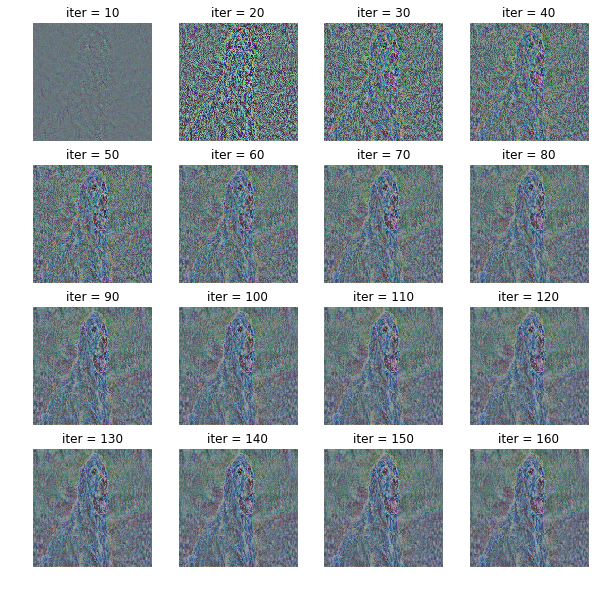

In [54]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (10, 10)
for i in range(int(np.sqrt(len(imgs))) * int(np.sqrt(len(imgs)))):
    a = fig.add_subplot(np.sqrt(len(imgs)), np.sqrt(len(imgs)),i+1)
    imgplot = plt.imshow(imgs[i])
    a.set_title("iter = "+ str((i+1)*10))
    plt.axis('off')

### Exercise: Above we visualized the inverted representations for the 18th layer, find similar representations for different layers in the network and thus visualize what the network learns at each of those layer. Try for different target images as well

In [59]:
modules[28]

Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

Iteration: 0 Loss: 0.0998986
Iteration: 10 Loss: 0.06044068
Iteration: 20 Loss: 0.035815805
Iteration: 30 Loss: 0.028474323
Iteration: 40 Loss: 0.023368193
Iteration: 50 Loss: 0.018718004
Iteration: 60 Loss: 0.014416341
Iteration: 70 Loss: 0.010536133
Iteration: 80 Loss: 0.0070666694
Iteration: 90 Loss: 0.0039120223
Iteration: 100 Loss: 0.0010058735
Iteration: 110 Loss: -0.0016206587
Iteration: 120 Loss: -0.0042020124
Iteration: 130 Loss: -0.0066369614
Iteration: 140 Loss: -0.008920165
Iteration: 150 Loss: -0.01107336
Iteration: 160 Loss: -0.013180407


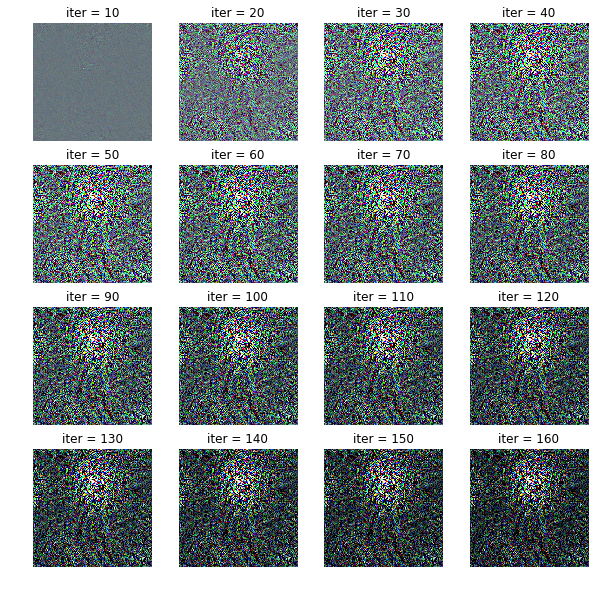

In [80]:
random_noise_img = Variable(1e-1 * torch.randn(1, 3, 224, 224), requires_grad=True)
# random_noise_img = torch.clamp(random_noise_img, max=1e6) ### IAS: We were somehow hitting inf... so clamping this

target_layer = 28    ## which is this layer Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
inp_img = normalize(Image.open("./dog.jpg"))
inp_img_representation = get_output_at_nth_layer(inp_img, target_layer)

from torch.optim import SGD
import utils

#define optimizers for learning the representation of the noise input image
optimizer = SGD([random_noise_img], lr=1e4, momentum=0.9)
alpha_reg_alpha = 1
alpha_reg_lambda = 1e-7
tv_reg_beta = 2
tv_reg_lambda = 1e-8
## Put model into evaluation state
model.eval

imgs=[]
for i in range(161):
        optimizer.zero_grad()
        
        ## get output at the target layer (not the final layer)
        output = get_output_at_nth_layer(random_noise_img, target_layer)
        
        # Calculate euclidian loss between output image and the target image
        euc_loss = 1e-1 * utils.euclidian_loss(inp_img_representation.detach(), output)
        
        # regularization
        reg_alpha = alpha_reg_lambda * utils.alpha_norm(random_noise_img, alpha_reg_alpha)
        reg_total_variation = tv_reg_lambda * utils.total_variation_norm(random_noise_img, tv_reg_beta)
        
        loss = euc_loss + reg_alpha + reg_total_variation
        loss.backward()
        optimizer.step()
        
        # Generate image every 5 iterations
        if i % 10 == 0:
            print('Iteration:', str(i), 'Loss:', loss.data.numpy()[0])
            x = utils.recreate_image(random_noise_img)
            imgs.append(x)

fig = plt.figure()
plt.rcParams["figure.figsize"] = (10, 10)
for i in range(int(np.sqrt(len(imgs))) * int(np.sqrt(len(imgs)))):
    a = fig.add_subplot(np.sqrt(len(imgs)), np.sqrt(len(imgs)),i+1)
    imgplot = plt.imshow(imgs[i])
    a.set_title("iter = "+ str((i+1)*10))
    plt.axis('off')            

In [61]:
# utils.alpha_norm(random_noise_img, alpha_reg_alpha)


RuntimeError: value cannot be converted to type double without overflow: inf

In [68]:
# type(random_noise_img.view(-1)**6)

torch.autograd.variable.Variable

In [72]:
# torch.clamp(random_noise_img, max=1e6)

Variable containing:
( 0 , 0 ,.,.) = 
  4.9774e-02  4.3445e-02 -5.4386e-02  ...   7.9779e-01  4.2418e-01 -8.9406e-02
  9.8470e-02  4.0151e-01 -4.3744e-01  ...  -4.9766e-01 -7.7922e-01 -3.3850e-01
  1.1929e+00  9.4950e-01 -2.7393e-01  ...  -7.7991e-01 -9.7283e-02  3.1955e-01
                 ...                   ⋱                   ...                
  2.2760e-01  9.1644e-01  5.1370e-01  ...   9.8836e-01 -9.8296e-01 -8.1118e-01
  5.9624e-02  1.2595e+00  6.6806e-01  ...   9.3652e-02  4.9283e-01  3.2830e-01
  3.7674e-02  7.3547e-02  4.5497e-02  ...  -5.6103e-01 -1.9268e-01 -2.9585e-01

( 0 , 1 ,.,.) = 
  2.3749e-02 -2.7566e-01 -1.5473e-01  ...   6.5612e-01 -4.7278e-02 -4.0930e-01
 -2.1355e-01  8.4252e-02 -8.4085e-01  ...  -1.3886e+00 -1.1538e+00 -1.2205e+00
  1.4945e+00  8.1014e-01  6.2375e-03  ...  -1.5314e+00 -9.3522e-01 -2.1229e-01
                 ...                   ⋱                   ...                
 -3.6666e-01  2.1150e-01 -8.8964e-03  ...   8.4501e-01 -7.9406e-01 -7.7888e

In [74]:
# torch.max(random_noise_img)

Variable containing:
 3.8833e+09
[torch.FloatTensor of size 1]